## Seaborn

Objective: Statistical visualizations.

High-level API based Matplotlib with strong integration of pandas.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("penguins")

In [3]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


#### High-level API:

Seaborn functions work on entire datasets and take care of many steps, such as aggregating data automatically.

#### Example: relplot

The relplot function is designed to visualize static relationships of all kinds:

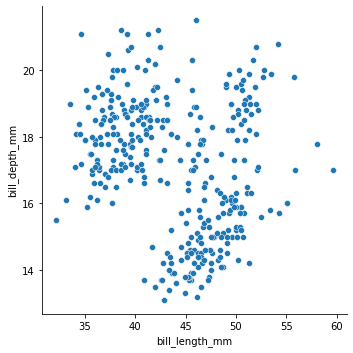

In [4]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    data=df,
)

With the help of a few arguments of the plotting function, you can add more variables to the plot.

Here, for example, the coloring of the scatter dots indicates the species of the penguins:

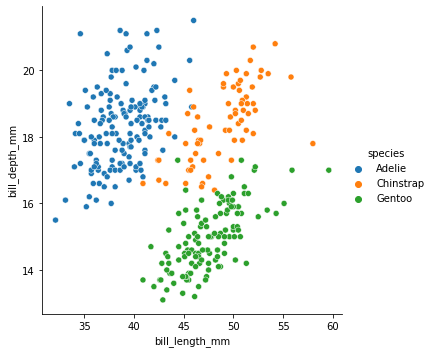

In [5]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    hue="species",
    data=df,
)

We can also change the dot's size according to their weights

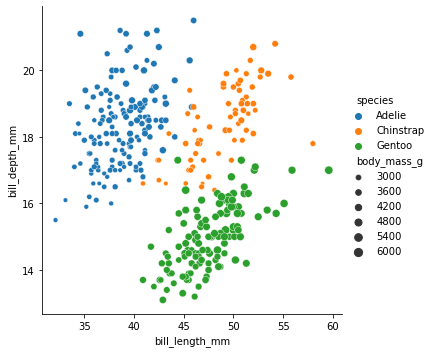

In [6]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    hue="species",
    size="body_mass_g",
    data=df,
)

Using the parameters col and row, multiple plots can be created based on a categorical variable:

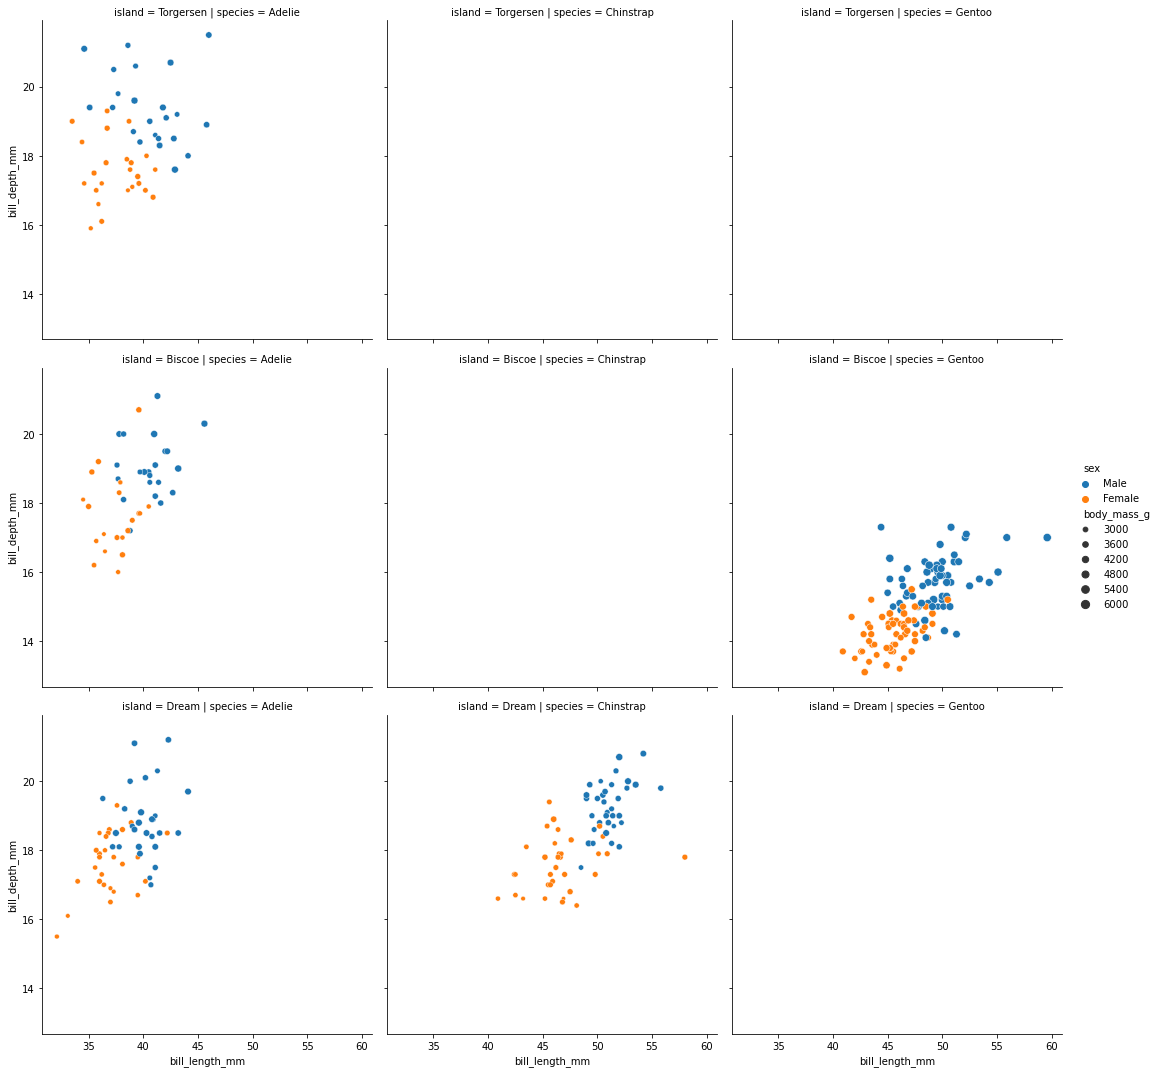

In [7]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    hue="sex",
    size="body_mass_g",
    col="species",
    row="island",
    data=df,
)

Continuous relationships can also be visualized using line plots (more on that later)...

#### Plot types:

Seaborn provides functions for different types of visualizations:

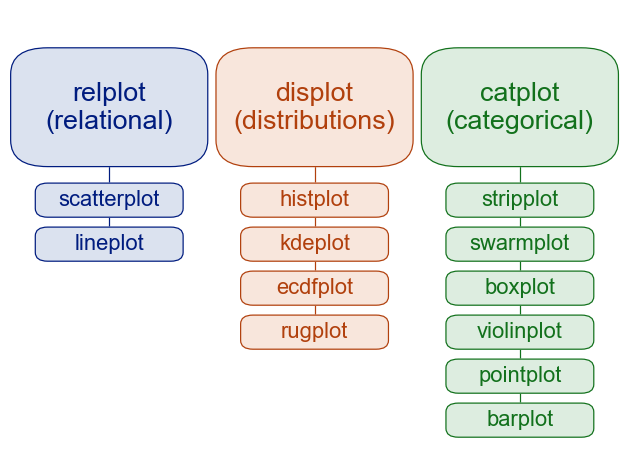

#### Distributions

Generate histograms or similar plots.

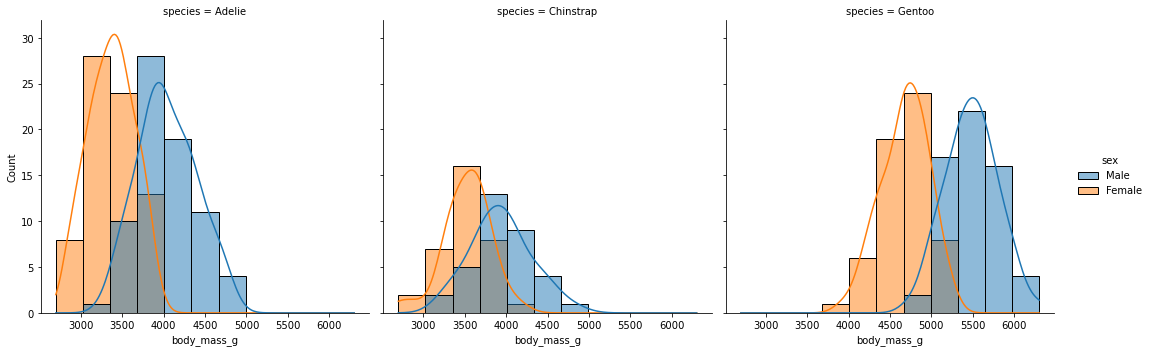

In [8]:
sns.displot(
    x="body_mass_g", col="species",
    hue="sex",
    kde=True,
    data=df
)

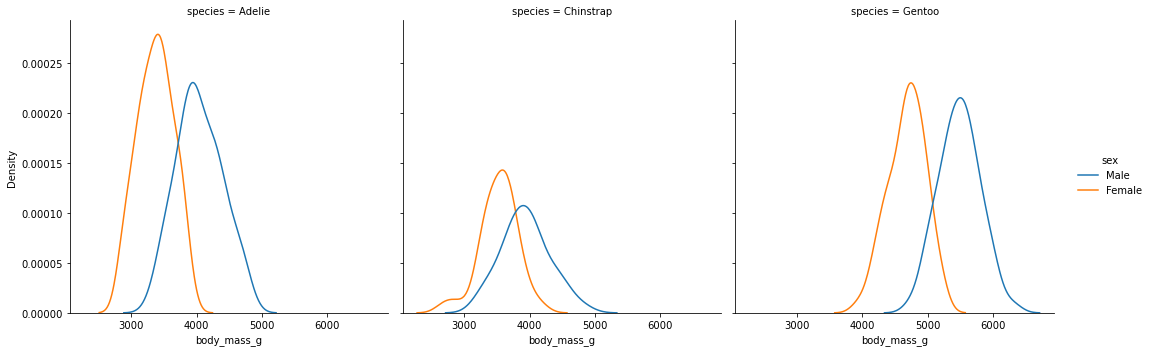

In [9]:
sns.displot(
    x="body_mass_g", col="species",
    hue="sex",
    kind="kde",
    data=df
)

#### Categorical data

Generate plots showing distributions split by certain values for categorical variables.


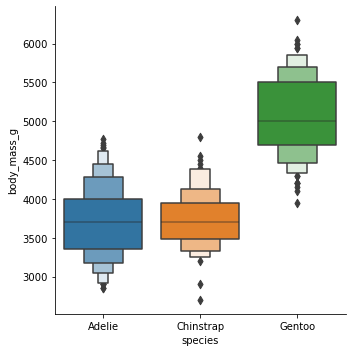

In [10]:
sns.catplot(
    x="species", y="body_mass_g",
    kind="boxen",
    data=df
)

However, it also works without classes...

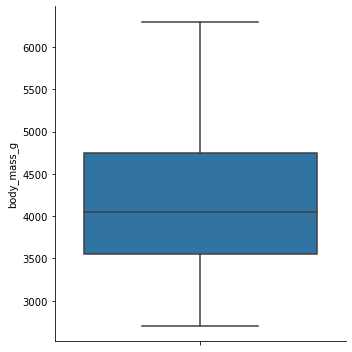

In [11]:
sns.catplot(
    y="body_mass_g",
    kind="box",
    data=df
)

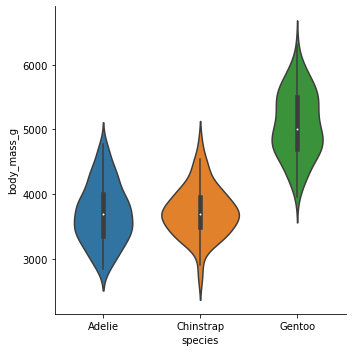

In [12]:
sns.catplot(
    x="species", y="body_mass_g",
    kind="violin",
    data=df
)

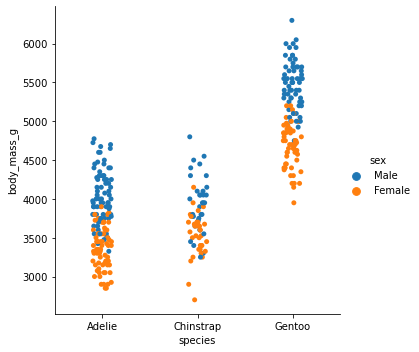

In [13]:
sns.catplot(
    x="species", y="body_mass_g",
    hue="sex",
    data=df
)

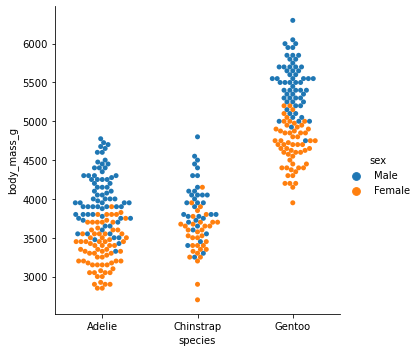

In [14]:
sns.catplot(
    x="species", y="body_mass_g",
    hue="sex",
    kind="swarm",
    data=df
)

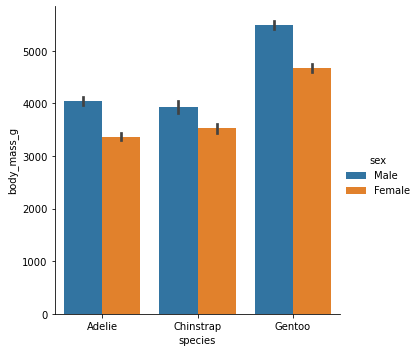

In [15]:
sns.catplot(
    x="species", y="body_mass_g",
    hue="sex",
    kind="bar",
    data=df
)

#### Regression plot

Fits a regression model to the data to be visualized and also plots certain model parameters.

Can be a neat way to visualize (linear) relations within your data.


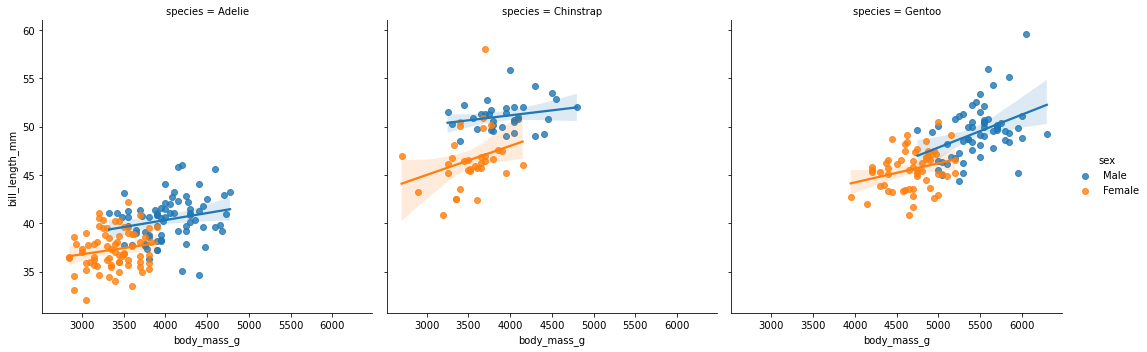

In [16]:
sns.lmplot(
    x="body_mass_g", y="bill_length_mm",
    hue="sex",
    col="species",
    data=df,
)

#### Multivariate Beziehungen

Especially in exploratory data analysis, it can be informative to plot different measurements or display formats in combination to gain more "global" insights.

The pairplot, for example, plots all variables of a data set against each other:


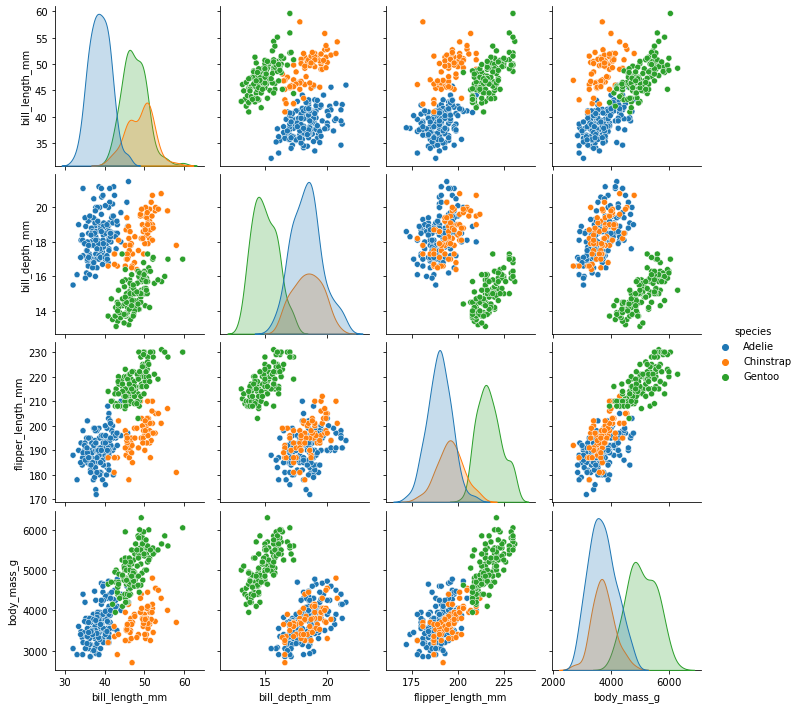

In [17]:
sns.pairplot(hue="species", data=df)

With the jointplot the display types histogram and scatterplot are combined:

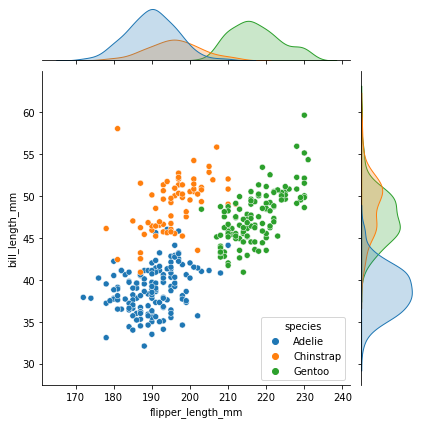

In [18]:
sns.jointplot(
    x="flipper_length_mm", y="bill_length_mm",
    hue="species",
    data=df
)

#### Seaborn and Pandas: Data Formats

Seaborn is designed to work with Panda's DataFrames.

The whole DateFrame can be passed with the data parameter and then columns can be selected using their name.


In [19]:
data = pd.DataFrame({
    "x": np.linspace(0, 20, 10000),
    "y": np.sin(np.linspace(0, 20, 10000))
})

<AxesSubplot:xlabel='x', ylabel='y'>

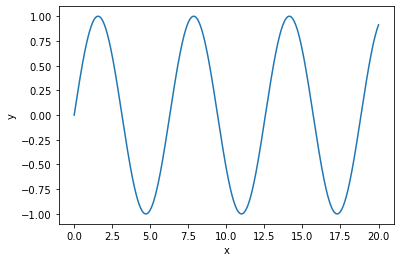

In [20]:
sns.lineplot(x="x", y="y", data=data)

However, Seaborn also accepts other data types:

<AxesSubplot:>

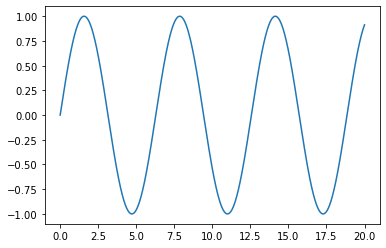

In [21]:
x = np.linspace(0, 20, 10000)
y = np.sin(x)

sns.lineplot(x=x, y=y)

<AxesSubplot:ylabel='Count'>

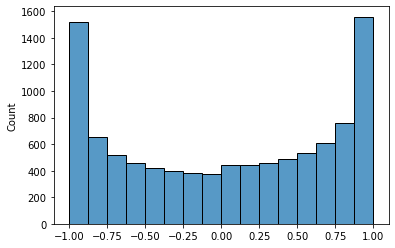

In [22]:
sns.histplot(y)

etc..

But of course you lose many of the helpful features of the DataFrame integration. (Most notably: Automatic axes labeling!).

#### DateFrames: Long- vs. Wide-form

DataFrames can contain data in different formats. For example, in longform format, where each variable has its own column.

Or in wideform format, which is more like traditional Excel spreadsheets and only contrasts two values.

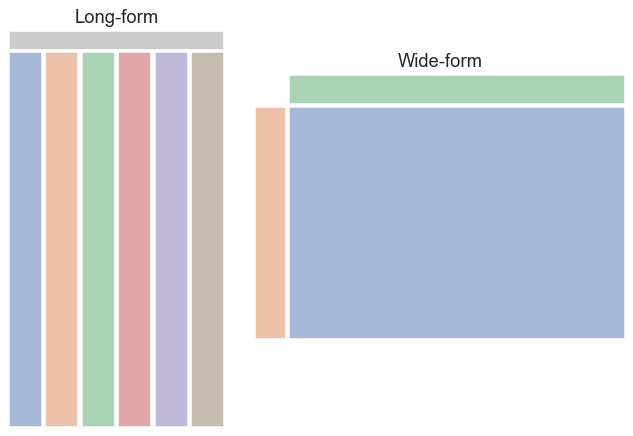

pandas is best at handling longform-based data:

In [23]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Here the data for the vast majority of plots are automatically aggregated and correctly prepared.

For example, here the spread of the number of passenger per month is automatically aggregated by year:

<AxesSubplot:xlabel='year', ylabel='passengers'>

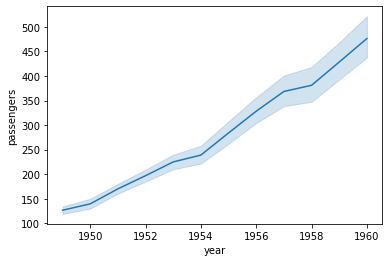

In [24]:
sns.lineplot(x="year", y="passengers", data=flights)

<AxesSubplot:xlabel='year', ylabel='passengers'>

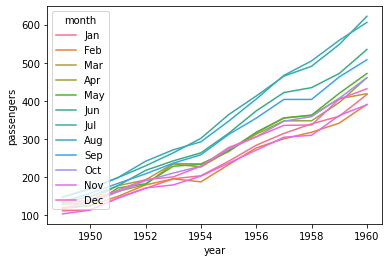

In [25]:
sns.lineplot(x="year", y="passengers", hue="month", data=flights)

The same mechanism also works the other way round:

<AxesSubplot:xlabel='month', ylabel='passengers'>

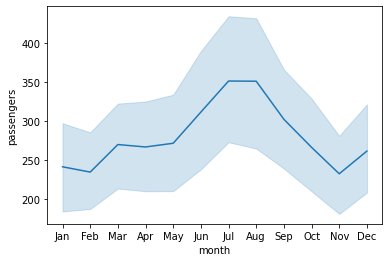

In [26]:
sns.lineplot(x="month", y="passengers", data=flights)

<AxesSubplot:xlabel='month', ylabel='passengers'>

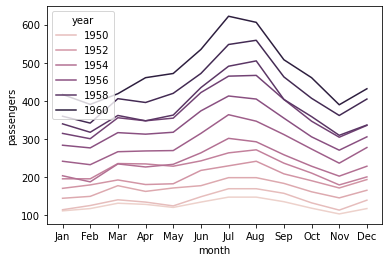

In [27]:
sns.lineplot(x="month", y="passengers", hue="year", data=flights)

#### Messy Data:

Some datasets also come in more complex formats. For example, different hierarchical levels could be mixed.


In [49]:
#freqs = pd.read_csv("freqs-engl.txt", sep="\t")
#freqs.head()
#https://github.com/pielstroem/data_examples/blob/main/freqs-engl.txt

Example: Comparing the frequencies of you and thou for tragedies and comedies.

To generate a histogram of the frequencies of the two words for both genres, we need to convert the data into long-form using the .melt method of DataFrames.

In [32]:
"""plot_df = freqs.query("genre == 'tragedy' or genre == 'comedy'").melt(
    id_vars=["genre", "title", "year"],
    value_vars=["you", "thou"],
    var_name="token",
    value_name="freq"
)
plot_df
"""


'plot_df = freqs.query("genre == \'tragedy\' or genre == \'comedy\'").melt(\n    id_vars=["genre", "title", "year"],\n    value_vars=["you", "thou"],\n    var_name="token",\n    value_name="freq"\n)\nplot_df\n'

Since we lose data by applying this transformation, it is recommended to save the result in a new DataFrame...

In [34]:
"""sns.displot(
    x="freq",
    hue="token",
    col="genre",
    kde=True,
    data=plot_df
)"""

'sns.displot(\n    x="freq",\n    hue="token",\n    col="genre",\n    kde=True,\n    data=plot_df\n)'

#### Matplotlib als Seaborn-Backend und weitere Anpassungsmöglichkeiten.

seaborn uses matplotlib as a backend framework to create the plots.

This means, it is to extend seaborn plots with matplotlib.

However, this is not necessary in all cases where you want to customize seaborn plots, because seaborn itself also provides some functions for this.

For this you have to distinguish between two types of plots:

    axes_level plots
    figure_level plots

axes_level plots return a matplotlib axes object containing the plot while figure_level plots return a FacetGrid object containing the plot.

#### FacetGrid

FacetGrid objects are special containers that seaborn uses to encapsulate one (or more) graphic(s) and the data they generate.


In [35]:
#df.head(3)

In [36]:
#g = sns.FacetGrid(df)

You can assign individual columns and rows of a 'FacetGrid' to specific variables from the data set.

In [37]:
#g = sns.FacetGrid(df, col="species", row="sex", hue="island")

Using the .map method of Facetgrid, it is possible to apply various plotting functions to each subplot (and its associated data) of a FacetGrid.

In [38]:
"""g.map(sns.scatterplot, "body_mass_g", "bill_length_mm")
g.add_legend()
g.figure"""

'g.map(sns.scatterplot, "body_mass_g", "bill_length_mm")\ng.add_legend()\ng.figure'

Certain plotting functions of Seaborn require the data as DataFrame via the data parameter. To apply those functions to the FacetGrid too, you can use the .map_dataframe method.

In [40]:
"""
g = sns.FacetGrid(df, col="species", row="sex", hue="island")

g.map_dataframe(sns.swarmplot, y="body_mass_g")
g.add_legend()
g.figure
"""

'\ng = sns.FacetGrid(df, col="species", row="sex", hue="island")\n\ng.map_dataframe(sns.swarmplot, y="body_mass_g")\ng.add_legend()\ng.figure\n'

FacetGrid objects encapsulate the subplots they contain in the axes attribute.

In [41]:
#g.axes

In [42]:
"""
g.axes[0][0].set_title("1.")
g.axes[0][1].set_title("2.")
g.figure
"""

'\ng.axes[0][0].set_title("1.")\ng.axes[0][1].set_title("2.")\ng.figure\n'

The entire graphic is stored in the figure attribute.

These objects are again classic matplotlib graphics and can be adapted or processed accordingly.

In [44]:
"""g.figure.suptitle("My first custom FacetGrid :-)", y=1.1)
g.figure"""

'g.figure.suptitle("My first custom FacetGrid :-)", y=1.1)\ng.figure'

The advantage of 'FacetGrids' is that you can create and customize your own plots quite flexibly without having to drop any of seaborn's convenient features.

#### figure_level-Plots

High-level plot functions, such as relplot, catplot or displot mostly return a FacetGrid object.

In [45]:
#g = sns.catplot(x="species", y="body_mass_g", hue="sex", data=df)

In [46]:
#type(g)

Since FacetGrid serve as containers for axes, figure, they are poorly adapted to other graphics and should be used to create a coherent graphic.

#### axes_level-Plots

As the name suggests, axes_level plots return a matplotlib axes object. axes_level plots are intended to be a drop-in replacement for matplotlib functions and can be well integrated into other plots or matplotlib workflows.


In [47]:
data.head(3)

,x,y
0,0.000,0.000
1,0.002,0.002
2,0.004,0.004


In [48]:
"""fig, axes = plt.subplots(2, 1)
axes[0].plot(data["x"], data["y"])
axes[0].set_title("Sine Curve")
sns.histplot(x=data["y"], ax=axes[1])
axes[1].set_title("Histogram of sine values")
fig.tight_layout()
fig.suptitle("Example for a combined matplotlib and seaborn plot", y=1.1)
plt.show()"""

'fig, axes = plt.subplots(2, 1)\naxes[0].plot(data["x"], data["y"])\naxes[0].set_title("Sine Curve")\nsns.histplot(x=data["y"], ax=axes[1])\naxes[1].set_title("Histogram of sine values")\nfig.tight_layout()\nfig.suptitle("Example for a combined matplotlib and seaborn plot", y=1.1)\nplt.show()'